In [1]:
options(warn = -1)#to turn on warnings back: options(warn = 0)

In [2]:
library(openxlsx)
data = read.xlsx("insurance_updated.xlsx")
head(data,5)
mean(data[,"charges"])
mean(data[,"bmi"])
mean(data[,"age"])

,smoker,region,sex,charges,bmi,age,children
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,0,16884.924,27.900,19,0
2,0,1,1,1725.552,33.770,18,1
3,0,1,1,4449.462,33.000,28,3
4,0,3,1,21984.471,22.705,33,0
5,0,3,1,3866.855,28.880,32,0


[1] 13270.42

[1] 30.6634

[1] 39.20703

In [3]:
library(EnvStats, exclude = c("predict", "predict.lm"))
library(scatterplot3d)

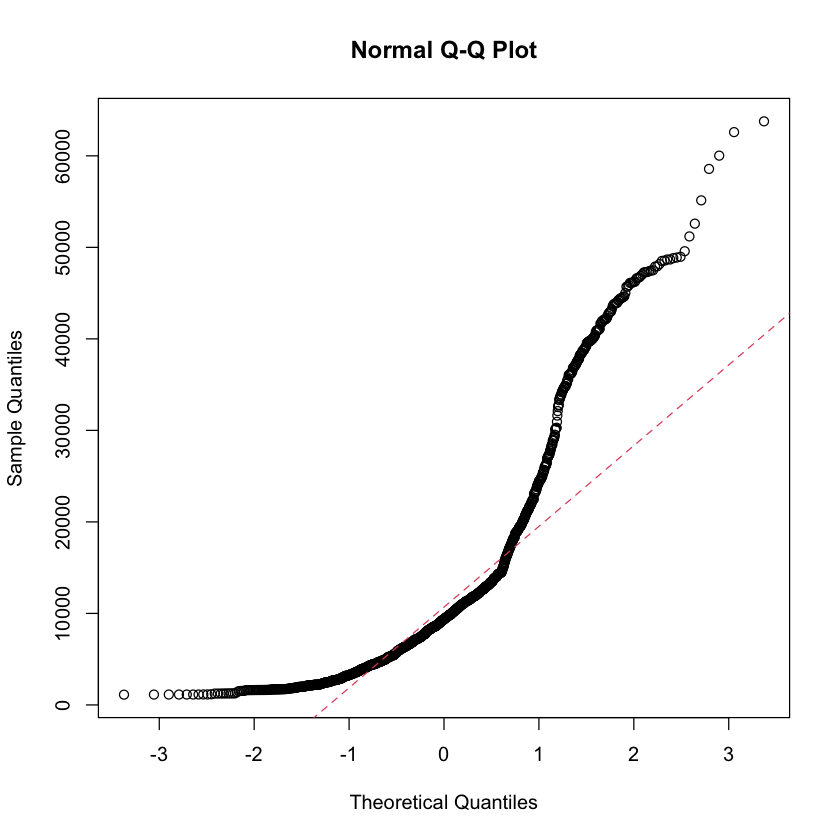

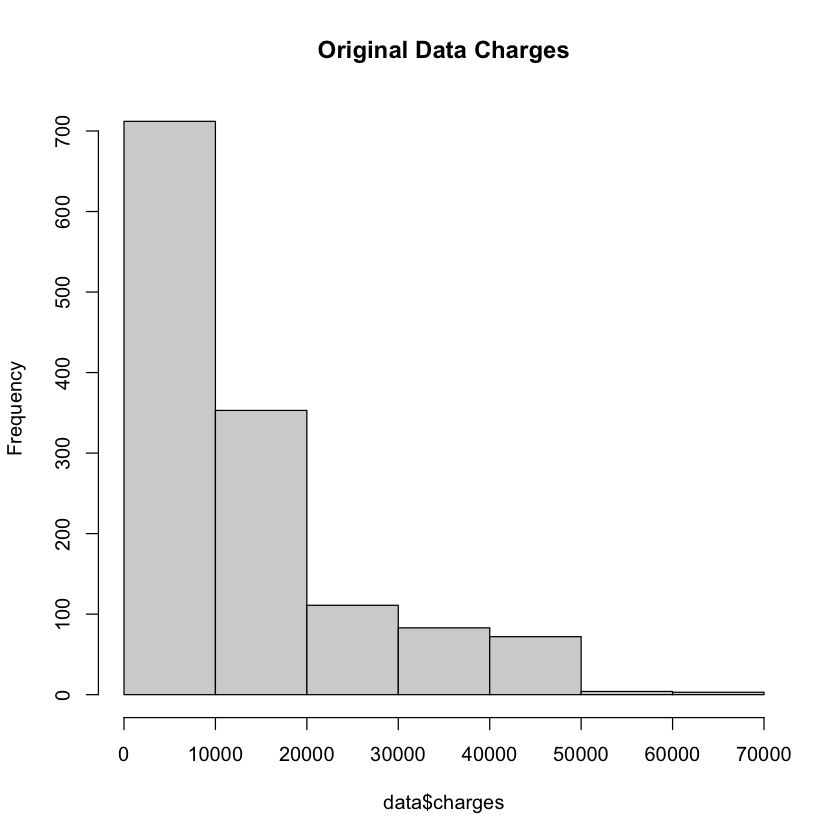

In [4]:
#For attribute charges #############
qqnorm(data$charges)
qqline(data$charges,col=2,lty=2)
hist(data$charges,breaks=8,main="Original Data Charges")#histogram

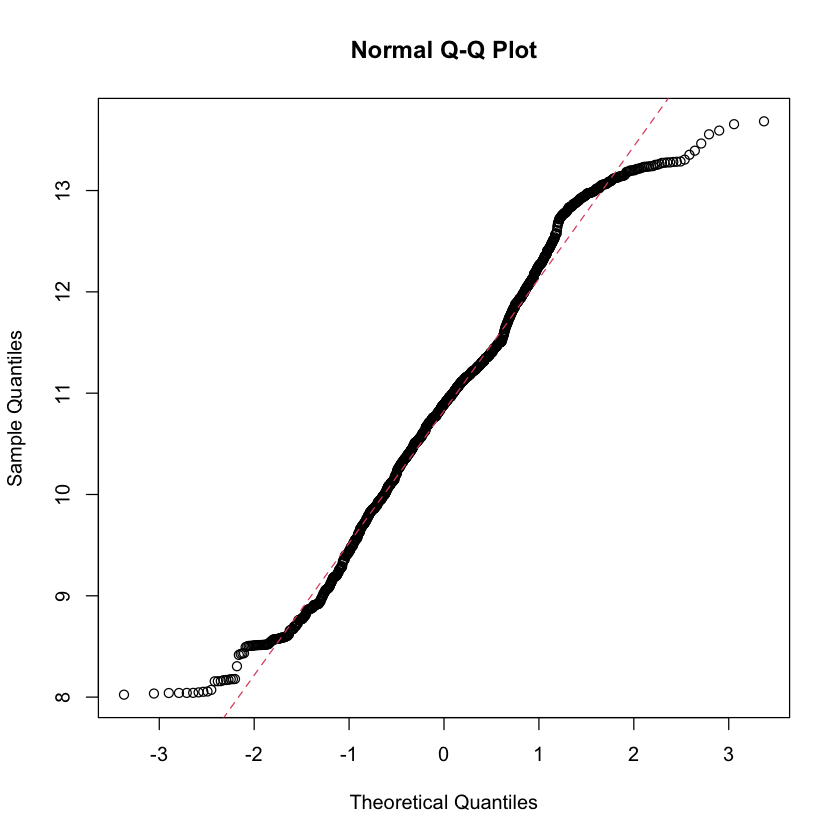

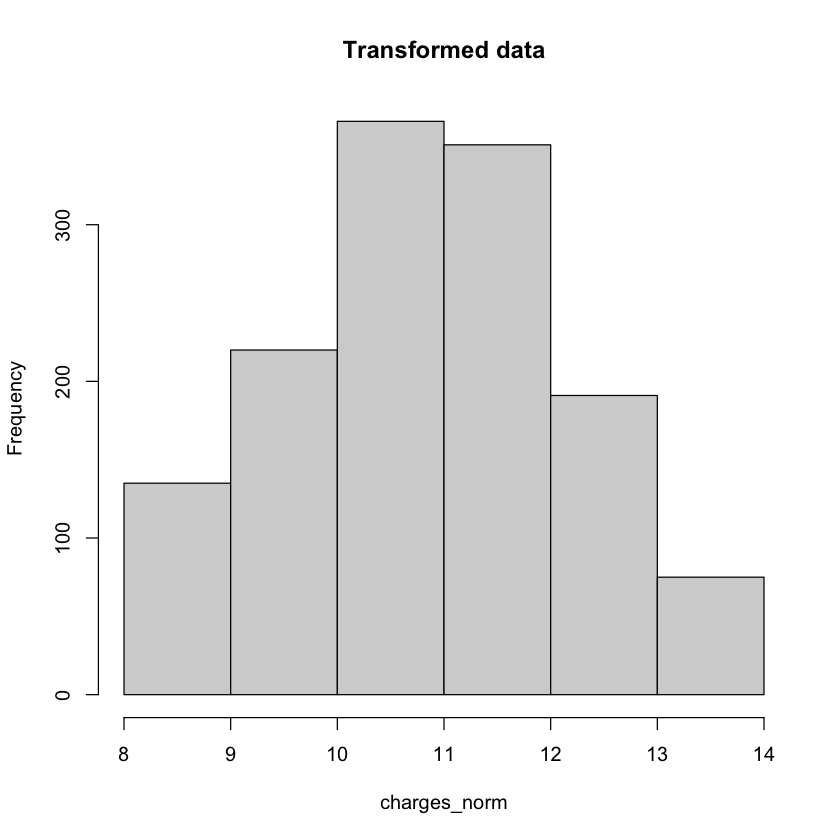

In [5]:
#Transformation Required
# Box-Cox Transformation of charges
tc=data$charges
BCL = boxcox(tc, optimize = TRUE)
lambda = BCL$lambda # best guess of lambda
charges_norm = (tc^lambda-1)/lambda # transformed data
qqnorm(charges_norm)
qqline(charges_norm,col=2,lty=2)
hist(charges_norm,breaks=8,main="Transformed data")#histogram

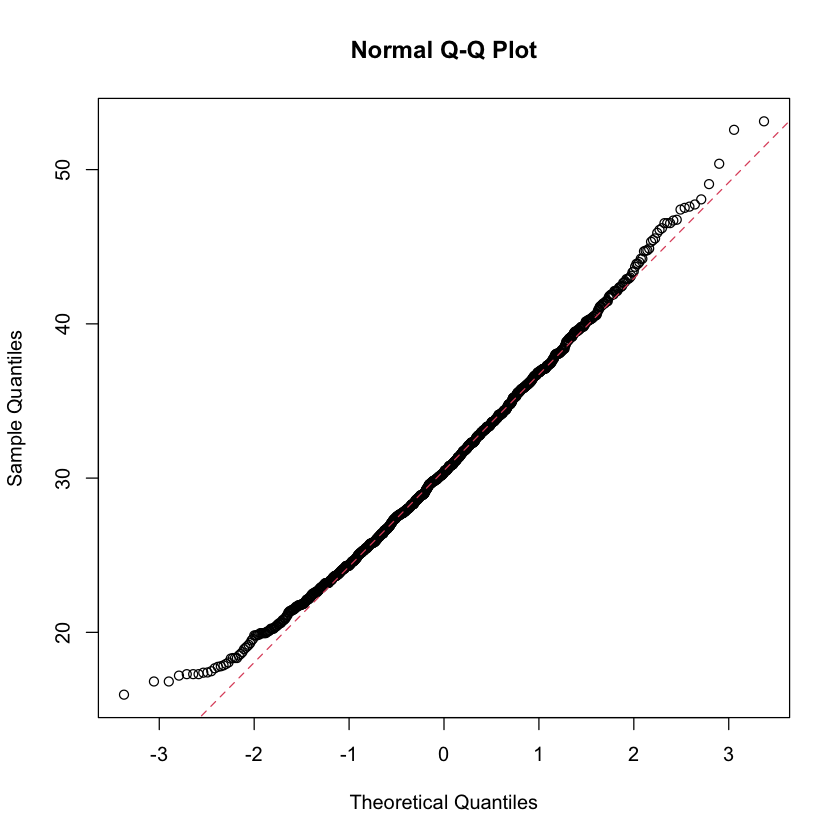

In [6]:
#For attribute bmi #############
qqnorm(data$bmi)
qqline(data$bmi,col=2,lty=2)


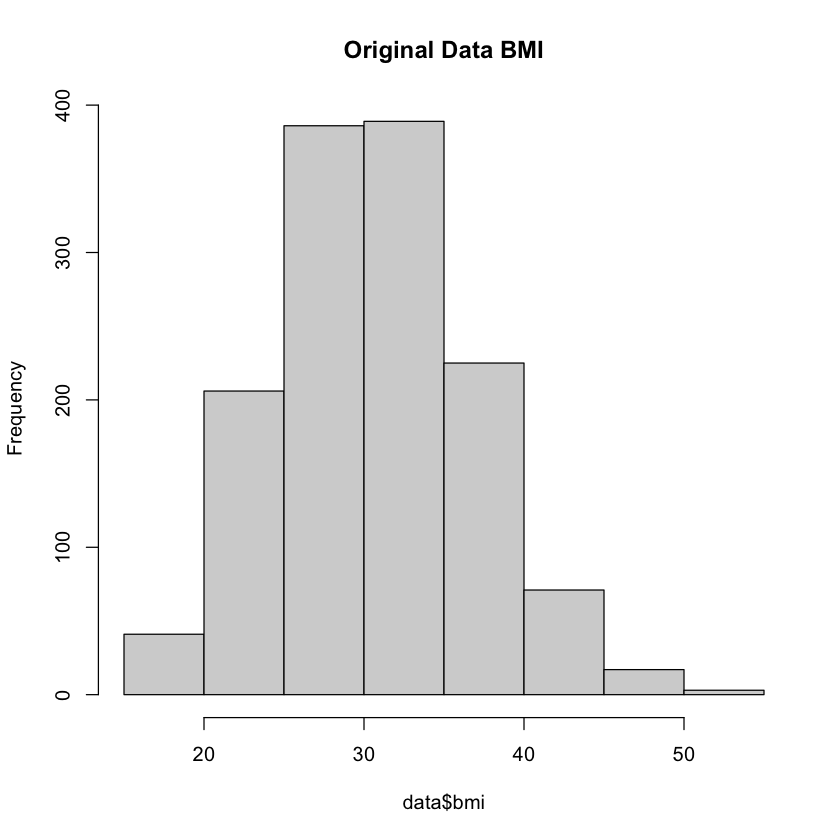

In [7]:
hist(data$bmi,breaks=8,main="Original Data BMI")
#bmi do not need any transformations

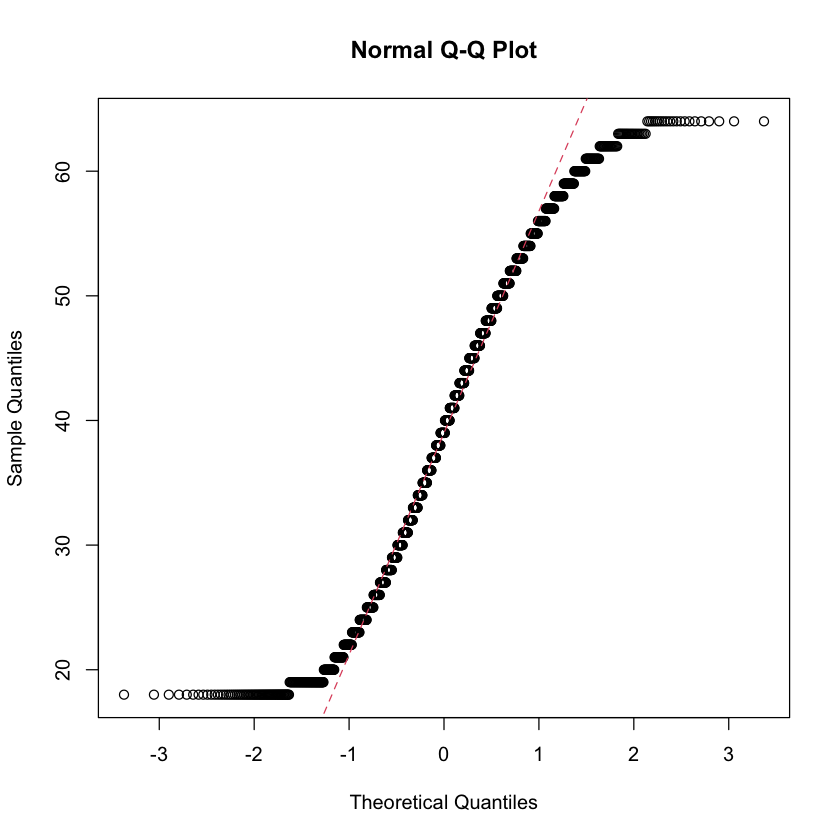

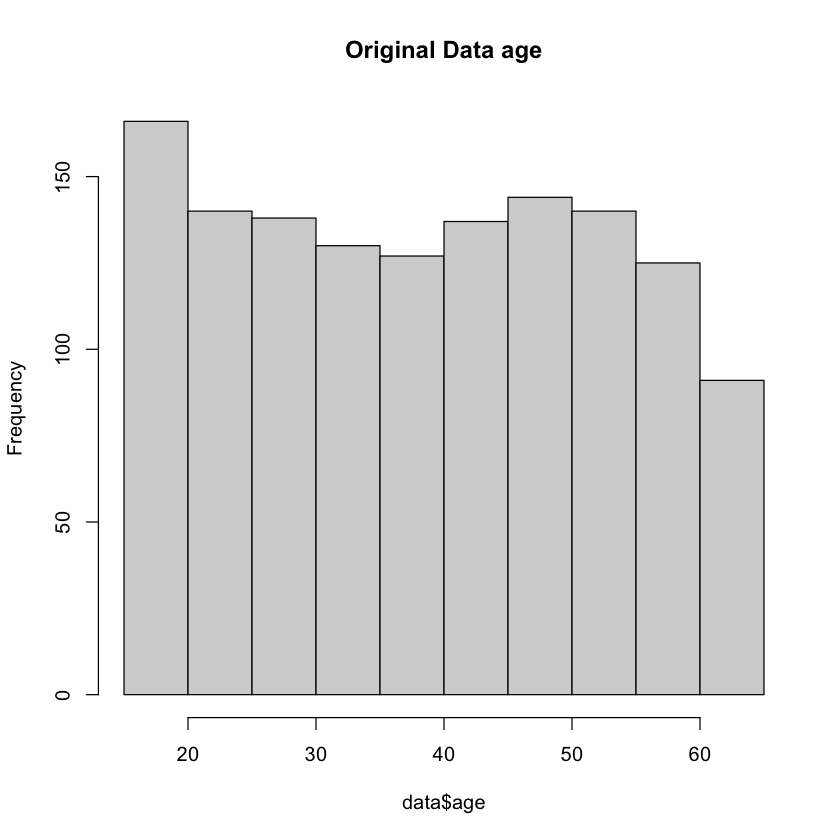

In [8]:
#For attribute age #############
qqnorm(data$age)
qqline(data$age,col=2,lty=2)
hist(data$age,breaks=8,main="Original Data age")

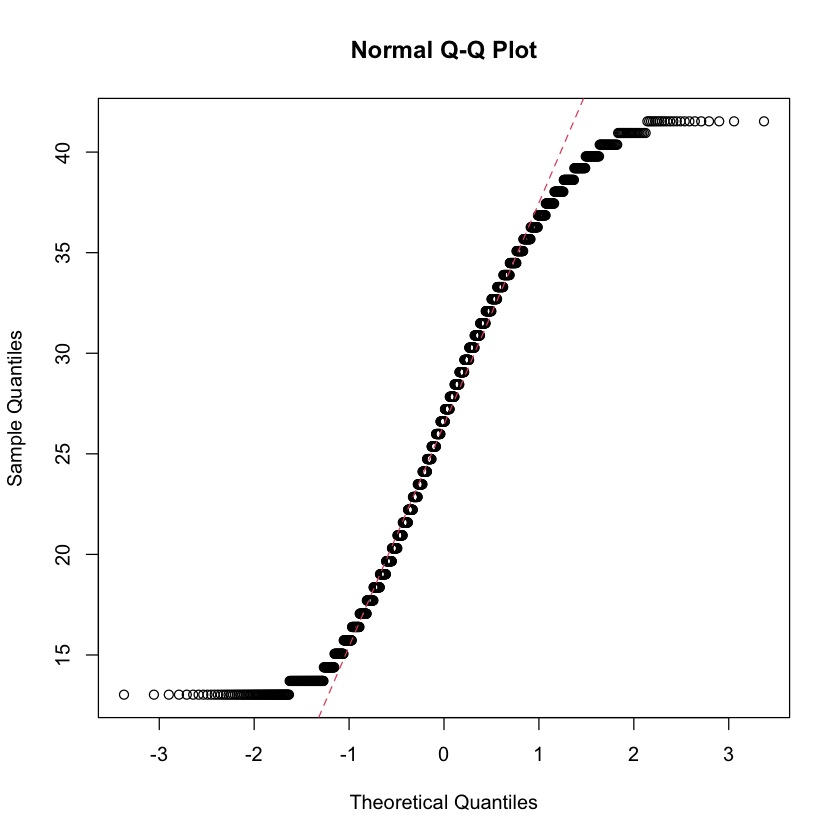

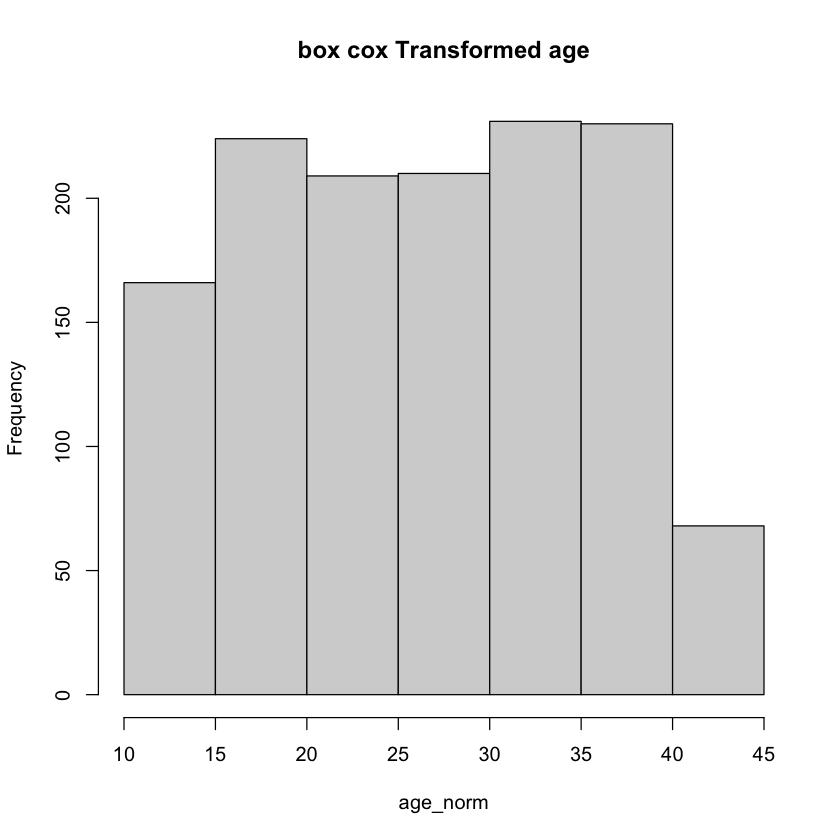

In [9]:
#We can transform this attribute
# Box-Cox Transformation of age
ta=data$age
BCL = boxcox(ta, optimize = TRUE)
lambda = BCL$lambda # best guess of lambda
age_norm = (ta^lambda-1)/lambda # transformed data
qqnorm(age_norm)
qqline(age_norm,col=2,lty=2)
hist(age_norm,breaks=8,main="box cox Transformed age")

In [10]:
# Numerical summaries of variables:
# means and standard deviations
library(dplyr)
summary_table_univariate = data %>%
summarize(
mean_charges = mean(charges),
sd_charges = sd(charges),
mean_bmi = mean(bmi),
sd_bmi = sd(bmi),
mean_age = mean(age),
sd_age = sd(age),
)
print(summary_table_univariate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




  mean_charges sd_charges mean_bmi   sd_bmi mean_age   sd_age
1     13270.42   12110.01  30.6634 6.098187 39.20703 14.04996


In [11]:
df_1 = data[,c("charges","bmi","age")]
summary_table = summary(df_1)
print(summary_table)

    charges           bmi             age       
 Min.   : 1122   Min.   :15.96   Min.   :18.00  
 1st Qu.: 4740   1st Qu.:26.30   1st Qu.:27.00  
 Median : 9382   Median :30.40   Median :39.00  
 Mean   :13270   Mean   :30.66   Mean   :39.21  
 3rd Qu.:16640   3rd Qu.:34.69   3rd Qu.:51.00  
 Max.   :63770   Max.   :53.13   Max.   :64.00  


In [12]:
#UNIVARIATE ANALYSIS BY GROUPS
# Load the ggplot2 package
library(ggplot2)

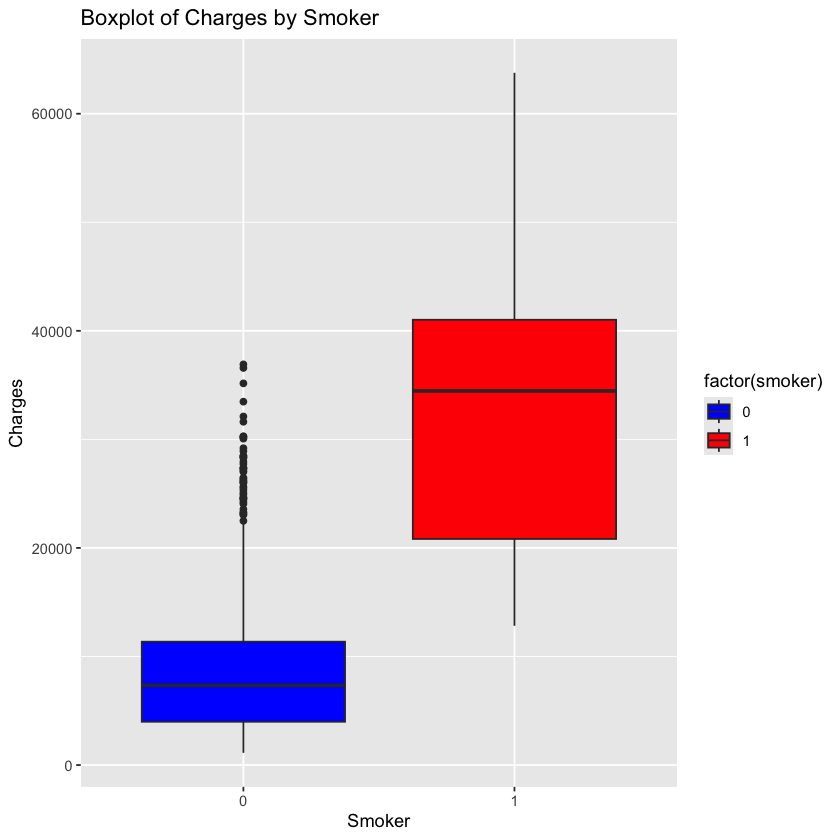

In [13]:
# Create boxplots of charges by smoker
ggplot(data, aes(x = as.factor(smoker), y = charges, fill = factor(smoker))) +
geom_boxplot() +
scale_fill_manual(values = c("blue", "red")) +
labs(title = "Boxplot of Charges by Smoker") +
xlab("Smoker") +
ylab("Charges")

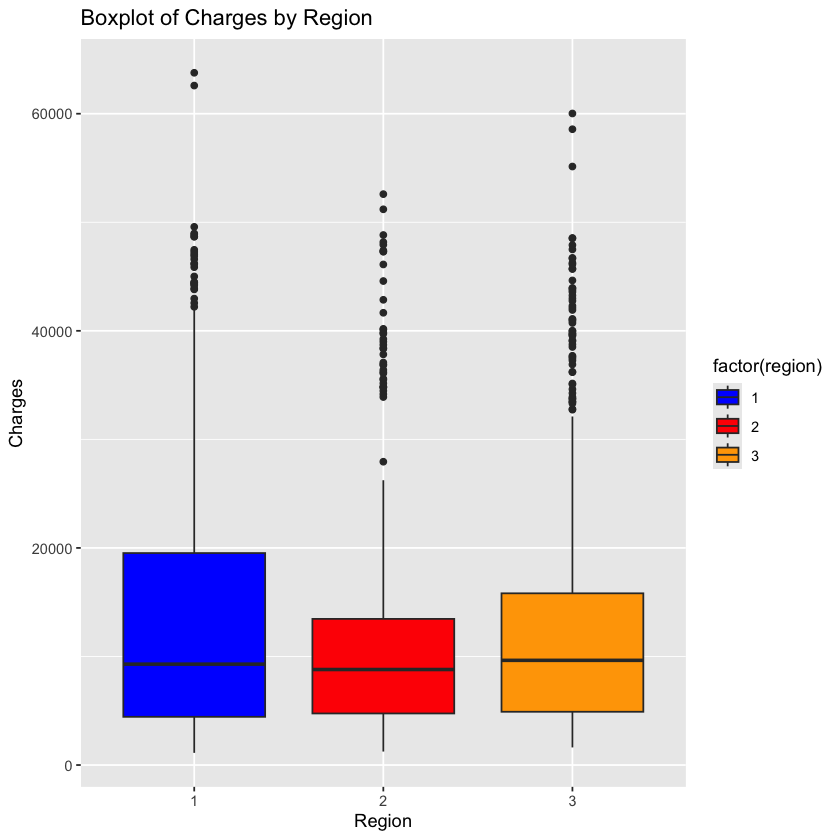

In [14]:
# Create boxplots of charges by Region
ggplot(data, aes(x = as.factor(region), y = charges, fill = factor(region))) +
geom_boxplot() +
scale_fill_manual(values = c("blue", "red","orange")) +
labs(title = "Boxplot of Charges by Region") +
xlab("Region") +
ylab("Charges")

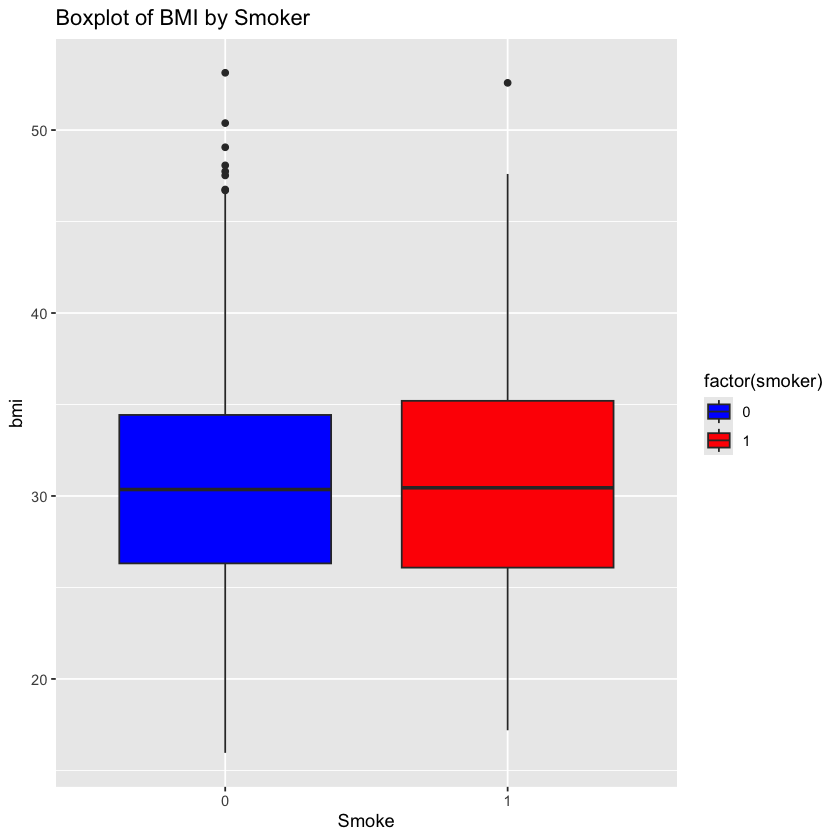

In [15]:
# Create boxplots of BMI by smoker
ggplot(data, aes(x = as.factor(smoker), y = bmi, fill = factor(smoker))) +
geom_boxplot() +
scale_fill_manual(values = c("blue", "red")) +
labs(title = "Boxplot of BMI by Smoker") +
xlab("Smoke")

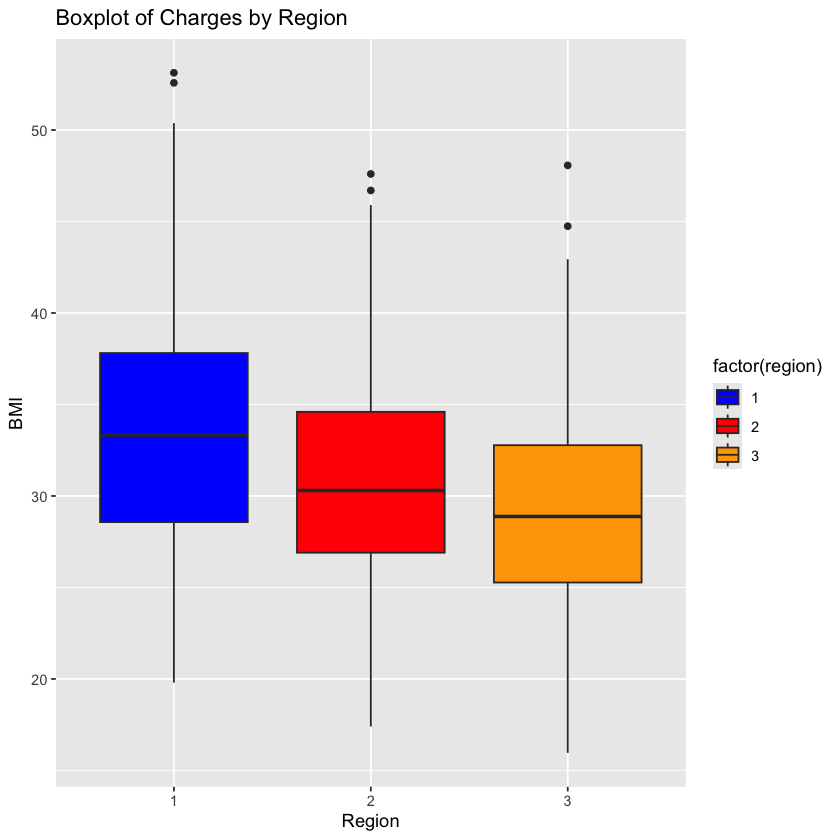

In [16]:
# Create boxplots of BMI by Region
ggplot(data, aes(x = as.factor(region), y = bmi, fill = factor(region))) +
geom_boxplot() +
scale_fill_manual(values = c("blue", "red","orange")) +
labs(title = "Boxplot of Charges by Region") +
xlab("Region") +
ylab("BMI")

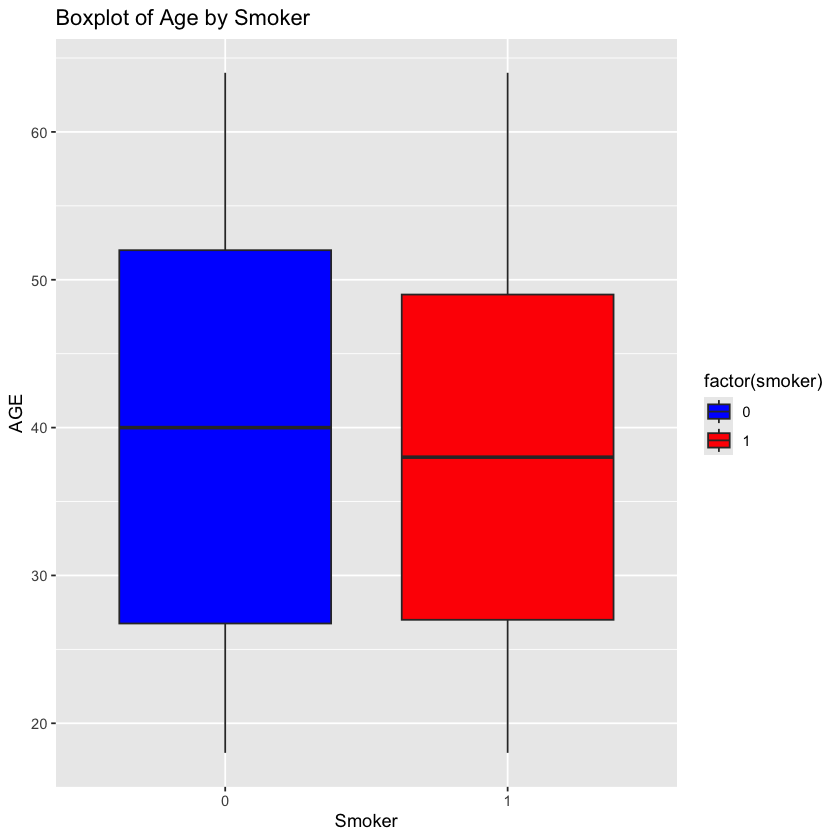

In [17]:
# Create boxplots of age by smoker
ggplot(data, aes(x = as.factor(smoker), y = age, fill = factor(smoker))) +
geom_boxplot() +
scale_fill_manual(values = c("blue", "red")) +
labs(title = "Boxplot of Age by Smoker") +
xlab("Smoker") +
ylab("AGE")

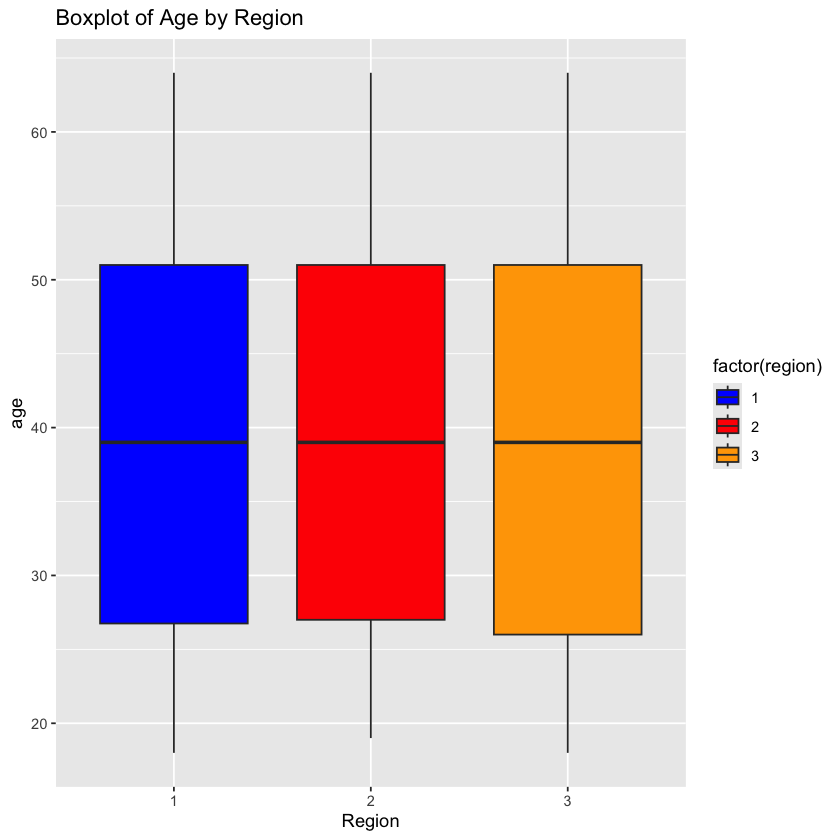

In [18]:
# Create boxplots of BMI by Region
ggplot(data, aes(x = as.factor(region), y = age, fill = factor(region))) +
geom_boxplot() +
scale_fill_manual(values = c("blue", "red","orange")) +
labs(title = "Boxplot of Age by Region") +
xlab("Region") +
ylab("age")

In [19]:
#Numerical summaries by group
# Group by smoker and calculate means and standard deviations
summary_table_primary <- data %>%
group_by(smoker) %>%
summarize(
mean_charges = mean(charges),
sd_charges = sd(charges),
mean_bmi = mean(bmi),
sd_bmi = sd(bmi),
mean_age = mean(age),
sd_age = sd(age),
)
print(summary_table_primary)

# A tibble: 2 × 7
  smoker mean_charges sd_charges mean_bmi sd_bmi mean_age sd_age
   <dbl>        <dbl>      <dbl>    <dbl>  <dbl>    <dbl>  <dbl>
1      0        8434.      5994.     30.7   6.04     39.4   14.1
2      1       32050.     11542.     30.7   6.32     38.5   13.9


In [20]:
#Groupby region and calculate means and standard deviations
summary_table_secondary <- data %>%
group_by(region) %>%
summarize(
mean_charges = mean(charges),
sd_charges = sd(charges),
mean_bmi = mean(bmi),
sd_bmi = sd(bmi),
mean_age = mean(age),
sd_age = sd(age),
)
print(summary_table_secondary)

# A tibble: 3 × 7
  region mean_charges sd_charges mean_bmi sd_bmi mean_age sd_age
   <dbl>        <dbl>      <dbl>    <dbl>  <dbl>    <dbl>  <dbl>
1      1       14735.     13971.     33.4   6.48     38.9   14.2
2      2       12347.     11557.     30.6   5.69     39.5   14.0
3      3       12911.     11167.     29.2   5.55     39.2   14.0


##Bivariate Analysis

In [22]:
#2. bivariate Analysis######################################
df_bivariate <- data[,c("smoker","region")]
charges <- charges_norm#Transformed charges
bmi <- data$bmi#bmi do not need any transformation
age <- age_norm#transformed age
df_bivariate <- cbind(df_bivariate,charges,bmi,age)#dataset updated with transformed values
head(df_bivariate,5)

,smoker,region,charges,bmi,age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,11.727362,27.900,13.70913
2,0,1,8.587561,33.770,13.02727
3,0,1,9.859281,33.000,19.66155
4,0,3,12.108138,22.705,22.85480
5,0,3,9.668029,28.880,22.22155



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




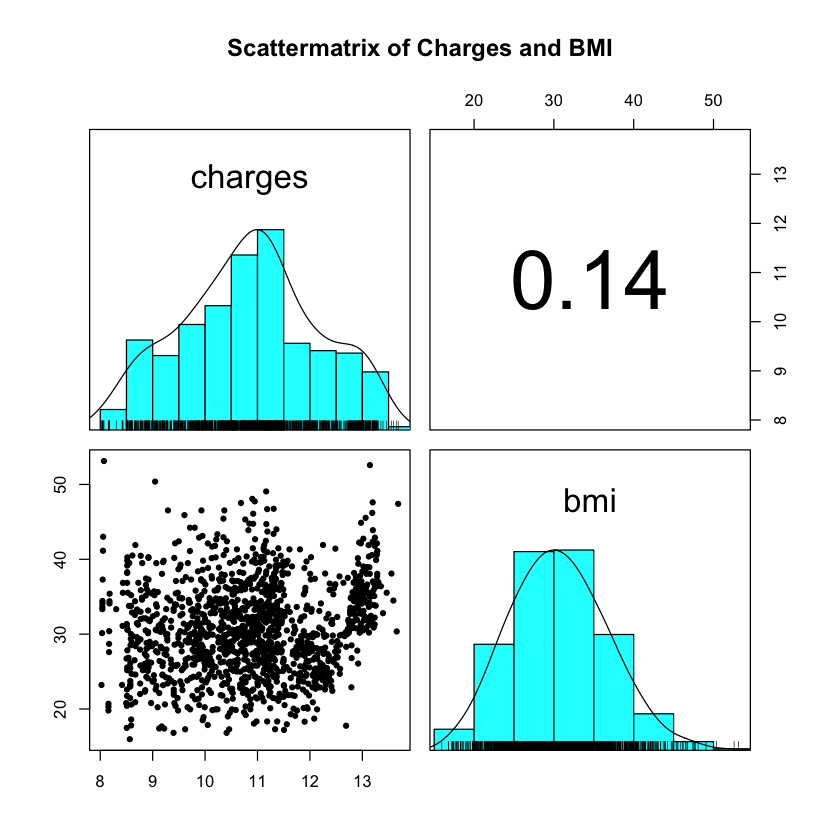

In [24]:
#graphical display that illustrates the relationship between each pair of the numerical variables.
#charges vs BMI
library (psych)
pairs.panels(df_bivariate[,c("charges","bmi")], main = "Scattermatrix of Charges and BMI",
smooth=FALSE, ellipses=FALSE)

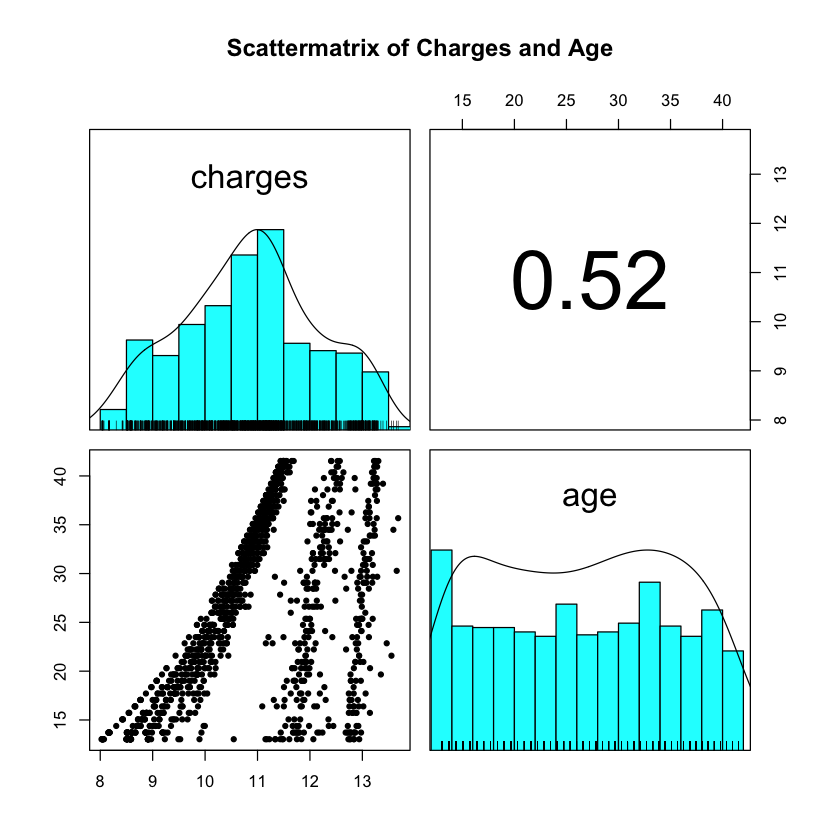

In [26]:
#charges vs age
library (psych)
pairs.panels(df_bivariate[,c("charges","age")], main = "Scattermatrix of Charges and Age",
smooth=FALSE, ellipses=FALSE)

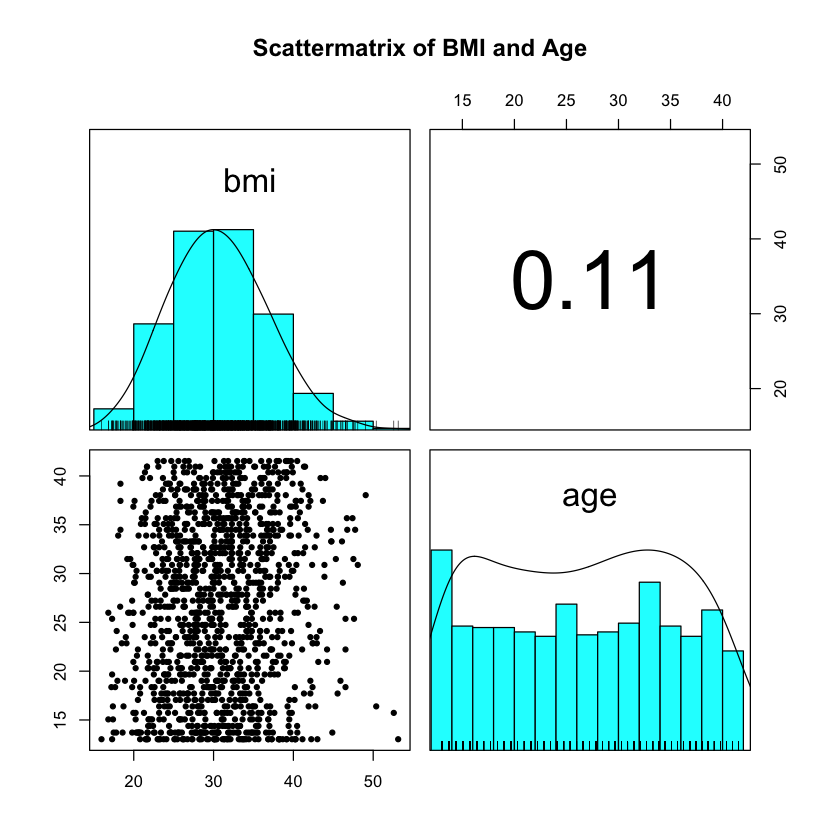

In [28]:
#charges vs age
library (psych)
pairs.panels(df_bivariate[,c("bmi","age")], main = "Scattermatrix of BMI and Age",
smooth=FALSE, ellipses=FALSE)

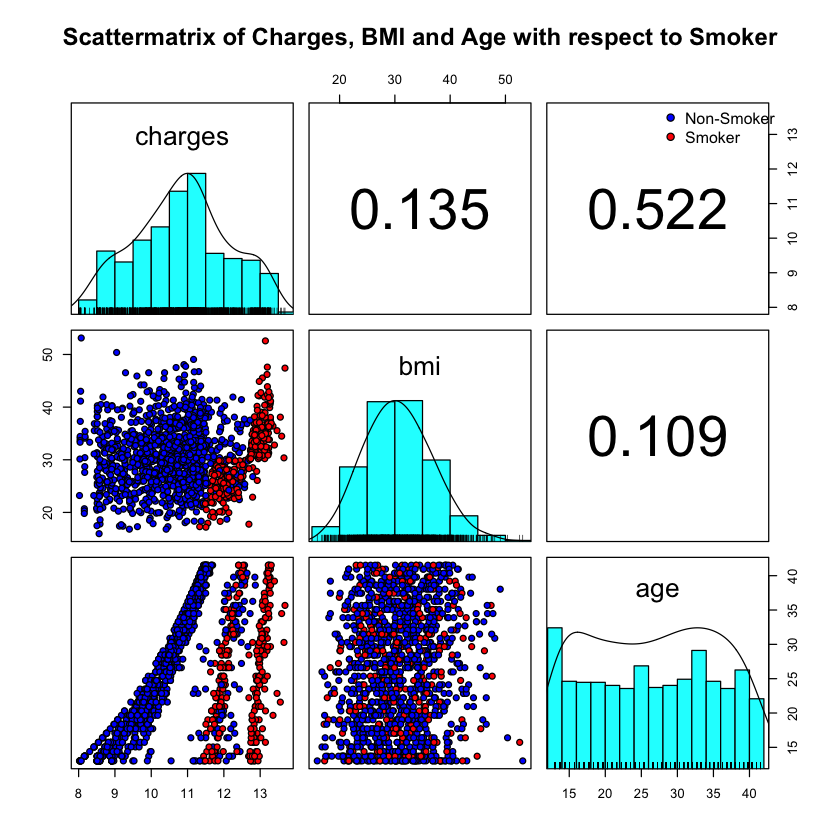

In [30]:
library(psych)
# Ensure smoker is a factor
df_bivariate$smoker <- factor(df_bivariate$smoker)
# Plot
pairs.panels(df_bivariate[, c("charges", "bmi", "age")],
             digits = 3,
             pch = 21,
             bg = c('blue', 'red')[df_bivariate$smoker],
             main = "Scattermatrix of Charges, BMI and Age with respect to Smoker",
             smooth = FALSE,
             ellipses = FALSE)
# Add legend
legend("topright", legend = c("Non-Smoker", "Smoker"),
       pch = 21, pt.bg = c("blue", "red"), bty = "n", cex = 0.8)

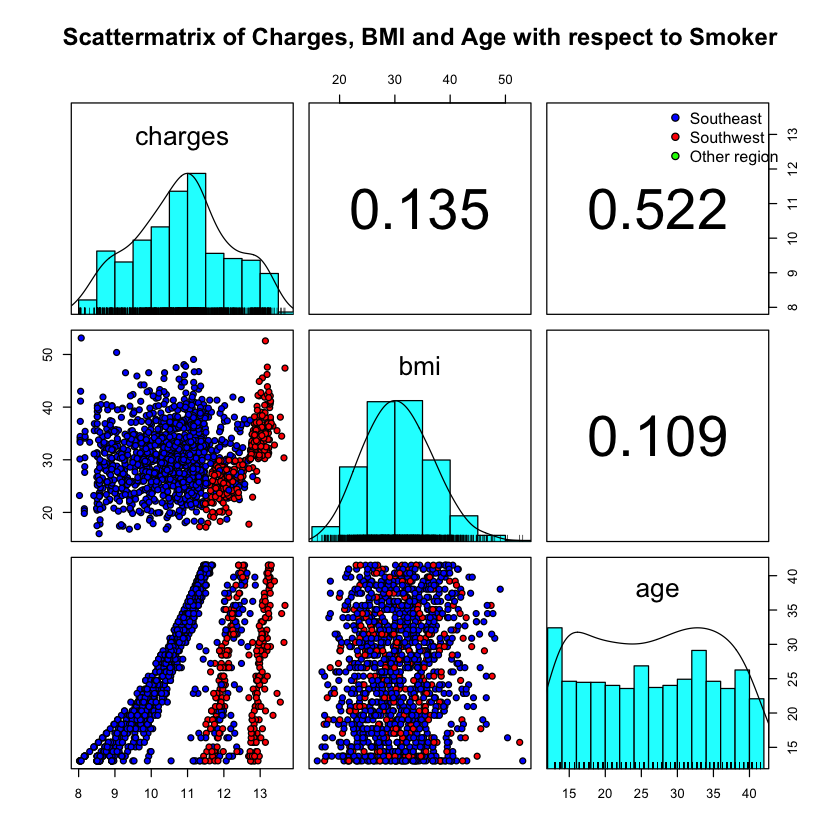

In [32]:
library(psych)
# Ensure smoker is a factor
df_bivariate$region <- factor(df_bivariate$region)
# Plot
pairs.panels(df_bivariate[, c("charges", "bmi", "age")],
             digits = 3,
             pch = 21,
             bg = c('blue', 'red','green')[df_bivariate$smoker],
             main = "Scattermatrix of Charges, BMI and Age with respect to Smoker",
             smooth = FALSE,
             ellipses = FALSE)
# Add legend
legend("topright", legend = c("Southeast", "Southwest","Other region"),
       pch = 21, pt.bg = c("blue", "red","green"), bty = "n", cex = 0.8)

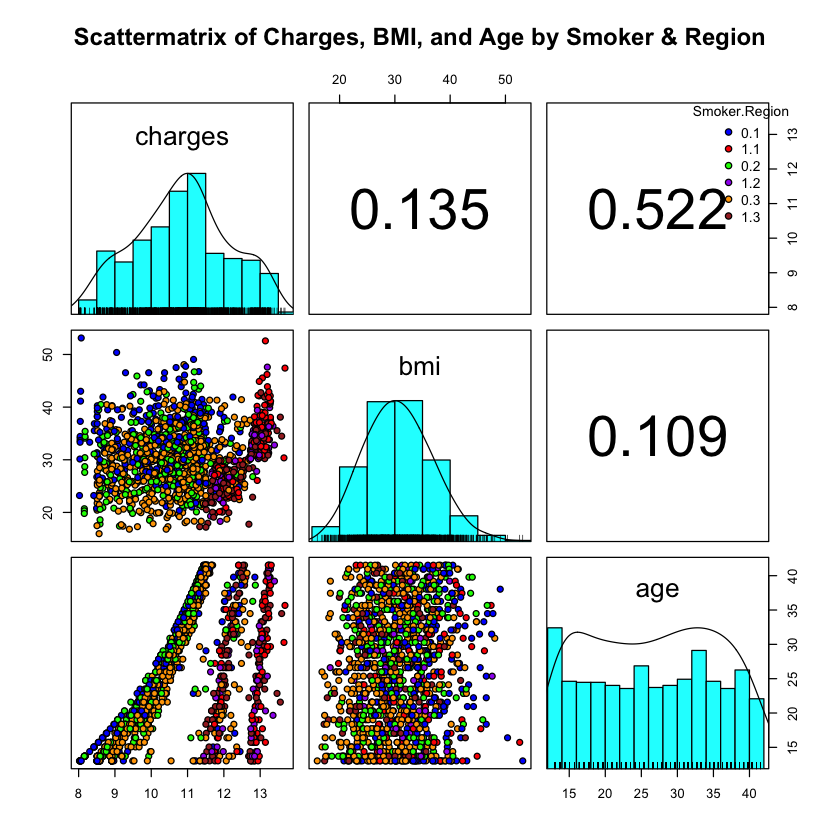

In [34]:
#wrto. two categories
library(psych)

# Ensure smoker and region are factors
df_bivariate$smoker = factor(df_bivariate$smoker)
df_bivariate$region = factor(df_bivariate$region)

# Create interaction variable
df_bivariate$group <- interaction(df_bivariate$smoker, df_bivariate$region)

# Define unique colors for each smoker-region combination
group_levels <- levels(df_bivariate$group)
group_colors <- c("blue", "red", "green", "purple", "orange", "brown")[df_bivariate$group]

# Plot the pairwise scatterplot matrix
pairs.panels(df_bivariate[, c("charges", "bmi", "age")],
             digits = 3,
             pch = 21,
             bg = group_colors,
             main = "Scattermatrix of Charges, BMI, and Age by Smoker & Region",
             smooth = FALSE,
             ellipses = FALSE)

# Add legend
legend("topright", legend = group_levels,
       pch = 21, pt.bg = c("blue", "red", "green", "purple", "orange", "brown")[1:length(group_levels)],
       bty = "n", cex = 0.7, title = "Smoker.Region")

In [38]:
charges=charges_norm
age=age_norm
df_multivariate = data[,c("smoker","region")]
df_multivariate = cbind(df_multivariate,charges,bmi,age)#dataset updated with transformed values
head(df_multivariate,5)

,smoker,region,charges,bmi,age
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,11.727362,27.900,13.70913
2,0,1,8.587561,33.770,13.02727
3,0,1,9.859281,33.000,19.66155
4,0,3,12.108138,22.705,22.85480
5,0,3,9.668029,28.880,22.22155


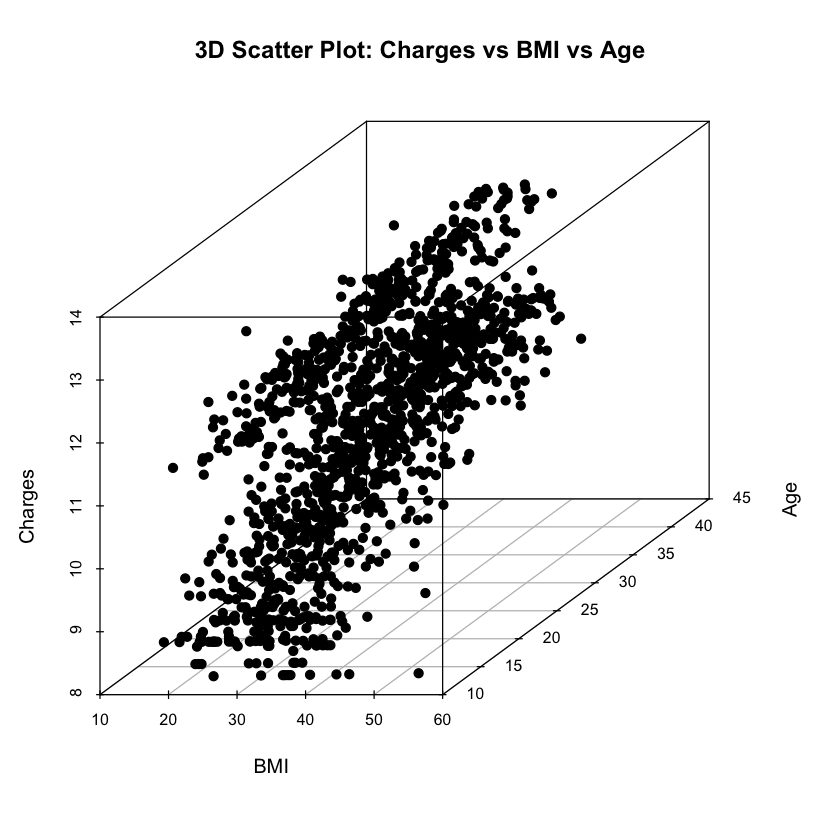

In [40]:
# Create 3D scatter plot
scatterplot3d(df_multivariate$bmi,
              df_multivariate$age,
              df_multivariate$charges,
              pch = 19,
              xlab = "BMI",
              ylab = "Age",
              zlab = "Charges",
              main = "3D Scatter Plot: Charges vs BMI vs Age")

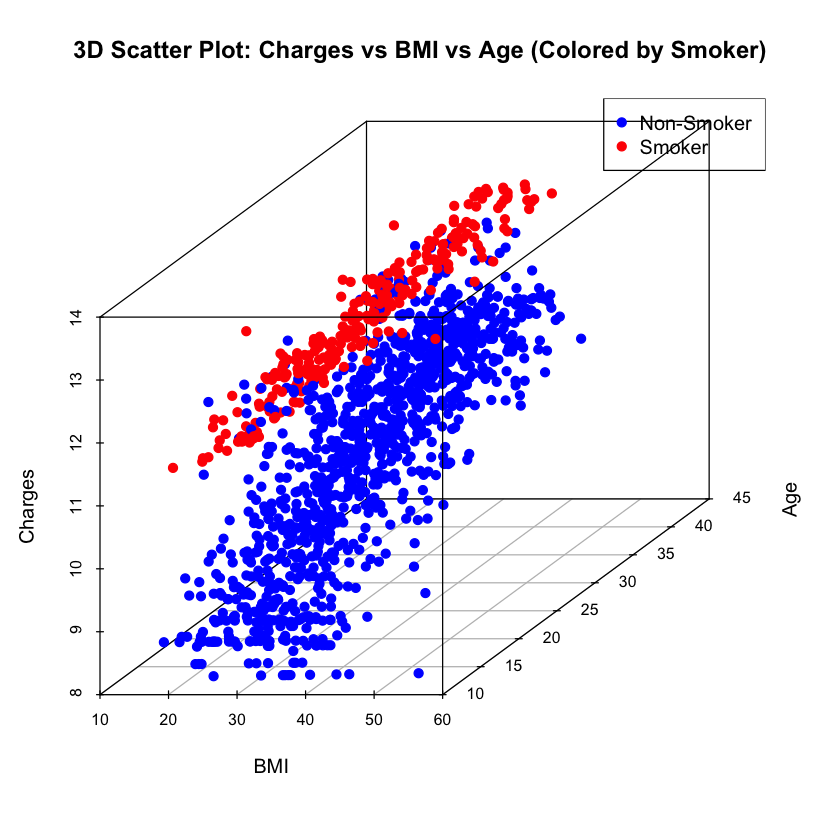

In [42]:
# Assign colors based on smoker status
colors = ifelse(df_multivariate$smoker == 1, "red", "blue")
# Create 3D scatter plot
scatterplot3d(df_multivariate$bmi,
              df_multivariate$age,
              df_multivariate$charges,
              color = colors,
              pch = 19,
              xlab = "BMI",
              ylab = "Age",
              zlab = "Charges",
              main = "3D Scatter Plot: Charges vs BMI vs Age (Colored by Smoker)")

legend("topright", legend = c("Non-Smoker", "Smoker"),
       col = c("blue", "red"), pch = 19)


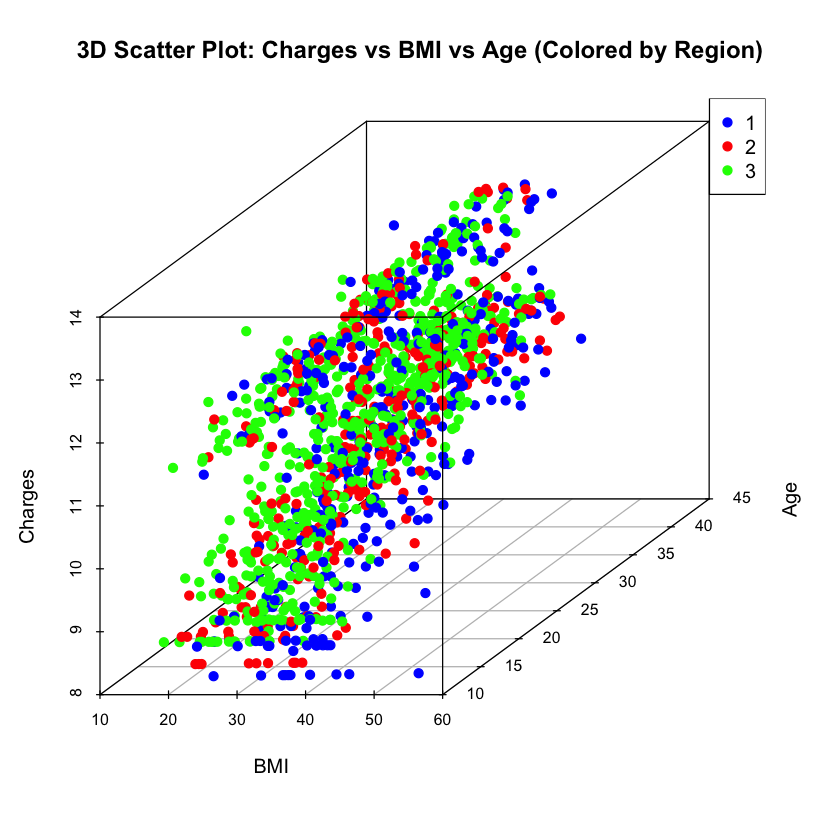

In [44]:
# Assign region colors
region_colors = as.numeric(factor(df_multivariate$region))
color_palette = c("blue", "red", "green")  # adjust to match levels
# Plot
scatterplot3d(df_multivariate$bmi,
              df_multivariate$age,
              df_multivariate$charges,
              color = color_palette[region_colors],
              pch = 19,
              xlab = "BMI",
              ylab = "Age",
              zlab = "Charges",
              main = "3D Scatter Plot: Charges vs BMI vs Age (Colored by Region)")

legend("topright", legend = levels(factor(df_multivariate$region)),
       col = color_palette, pch = 19)


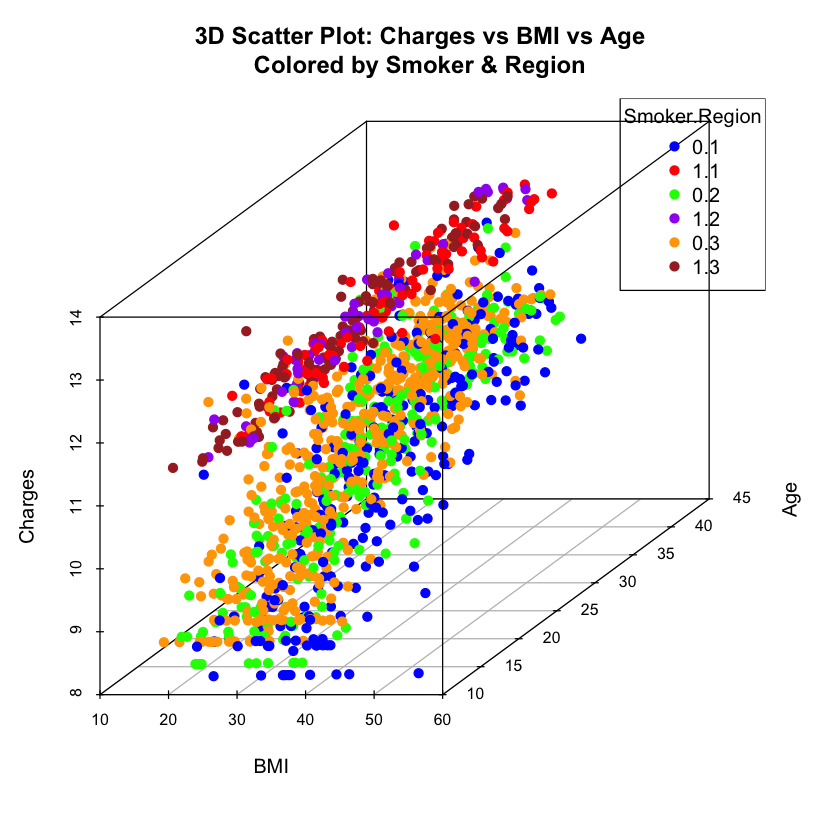

In [46]:
# Load the package
library(scatterplot3d)
# Create interaction factor of smoker and region
interaction_group = interaction(df_multivariate$smoker, df_multivariate$region)
# Assign custom colors to each combination
interaction_levels = levels(interaction_group)
color_map = setNames(c("blue", "red", "green", "purple", "orange", "brown"), interaction_levels)
point_colors = color_map[as.character(interaction_group)]
# Plot the 3D scatter plot
scatterplot3d(df_multivariate$bmi,
              df_multivariate$age,
              df_multivariate$charges,
              color = point_colors,
              pch = 19,
              xlab = "BMI",
              ylab = "Age",
              zlab = "Charges",
              main = "3D Scatter Plot: Charges vs BMI vs Age\nColored by Smoker & Region")
# Add legend
legend("topright", legend = interaction_levels,
       col = color_map, pch = 19, title = "Smoker.Region")

In [50]:
data_test = cbind(charges_norm,data$bmi,age_norm)
print(class(data_test))
dd=as.data.frame(data_test)
print(class(dd))
head(dd,5)

[1] "matrix" "array" 
[1] "data.frame"


,charges_norm,V2,age_norm
,<dbl>,<dbl>,<dbl>
1,11.727362,27.900,13.70913
2,8.587561,33.770,13.02727
3,9.859281,33.000,19.66155
4,12.108138,22.705,22.85480
5,9.668029,28.880,22.22155


Loading required package: broom



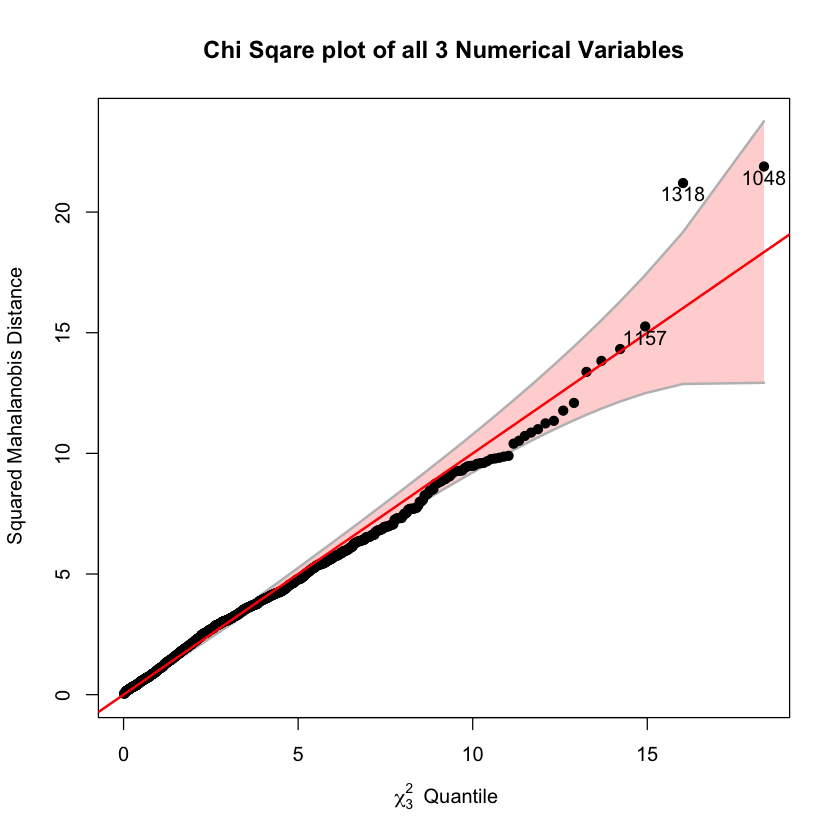

In [52]:
# Assuming 'data_test1' is our multivariate dataset
# and 'mu0' is the vector of mean values from the literature
# Perform Royston ’s test
library(MVN)
library(heplots)
cqplot(dd[, 1:3], id.n = 3, main = "Chi Sqare plot of all 3 Numerical Variables")

$multivariateNormality
     Test        H      p value MVN
1 Royston 155.4547 1.845012e-33  NO

$univariateNormality
              Test     Variable Statistic   p value Normality
1 Anderson-Darling charges_norm    3.7740  <0.001      NO    
2 Anderson-Darling      V2         1.2356  0.0032      NO    
3 Anderson-Darling   age_norm     18.6612  <0.001      NO    

$Descriptives
                n     Mean  Std.Dev   Median       Min      Max      25th
charges_norm 1338 10.84761 1.288249 10.89283  8.024158 13.68315  9.945891
V2           1338 30.66340 6.098187 30.40000 15.960000 53.13000 26.296250
age_norm     1338 26.51972 8.722629 26.60424 13.027273 41.52930 19.014261
                 75th          Skew    Kurtosis
charges_norm 11.70638 -0.0207695575 -0.65468407
V2           34.69375  0.2834105510 -0.05942352
age_norm     33.88865  0.0006316616 -1.25302541

$multivariateNormality
           Test       HZ p value MVN
1 Henze-Zirkler 26.14765       0  NO

$univariateNormality
              Test     Variable Statistic   p value Normality
1 Anderson-Darling charges_norm    3.7740  <0.001      NO    
2 Anderson-Darling      V2         1.2356  0.0032      NO    
3 Anderson-Darling   age_norm     18.6612  <0.001      NO    

$Descriptives
                n     Mean  Std.Dev   Median       Min      Max      25th
charges_norm 1338 10.84761 1.288249 10.89283  8.024158 13.68315  9.945891
V2           1338 30.66340 6.098187 30.40000 15.960000 53.13000 26.296250
age_norm     1338 26.51972 8.722629 26.60424 13.027273 41.52930 19.014261
                 75th          Skew    Kurtosis
charges_norm 11.70638 -0.0207695575 -0.65468407
V2           34.69375  0.2834105510 -0.05942352
age_norm     33.88865  0.0006316616 -1.25302541

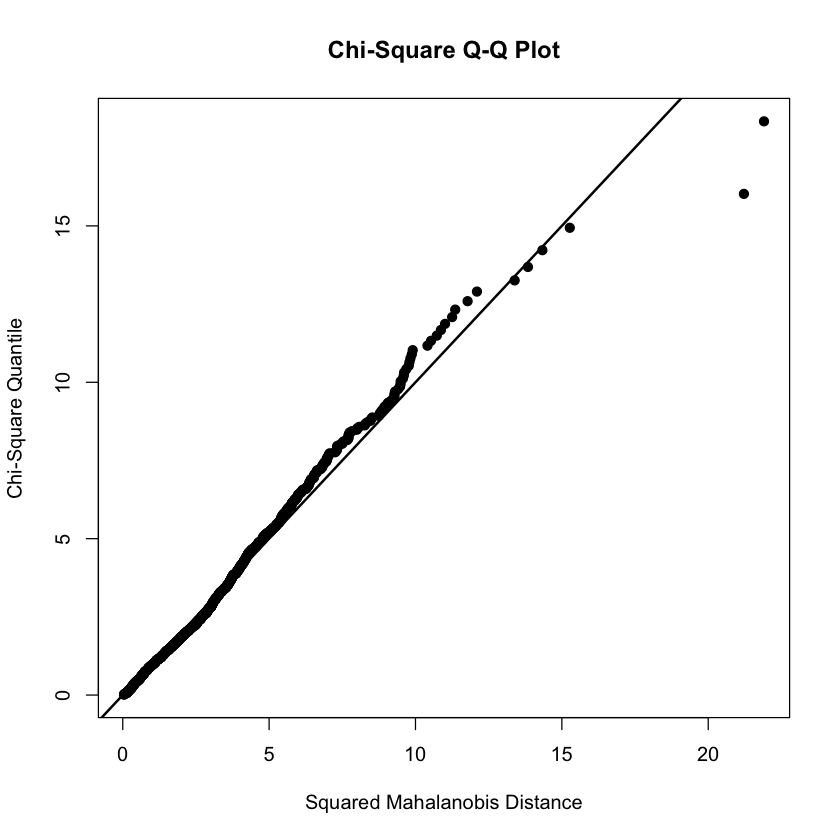

In [54]:
mvn(dd[,1:3] ,mvnTest="royston",multivariatePlot="qq")
mvn(dd[, 1:3], mvnTest= "hz", multivariatePlot= "qq")

In [56]:
library(DescTools)
mean_charges = 10.73 # Transformed mean
mean_bmi = 28.5
mean_age = 25.75
mu0 = c(mean_charges,mean_bmi,mean_age)
HotellingsT2Test(dd, mu = mu0, test = "f")


Attaching package: ‘DescTools’


The following objects are masked from ‘package:psych’:

    AUC, ICC, SD





	Hotelling's one sample T2-test

data:  dd
T.2 = 57.357, df1 = 3, df2 = 1335, p-value < 2.2e-16
alternative hypothesis: true location is not equal to c(10.73,28.5,25.75)



The downloaded binary packages are in
	/var/folders/lq/2_6xns4s5kdf1420gt7mfn_c0000gn/T//RtmpzW7eYi/downloaded_packages

The downloaded binary packages are in
	/var/folders/lq/2_6xns4s5kdf1420gt7mfn_c0000gn/T//RtmpzW7eYi/downloaded_packages



Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs




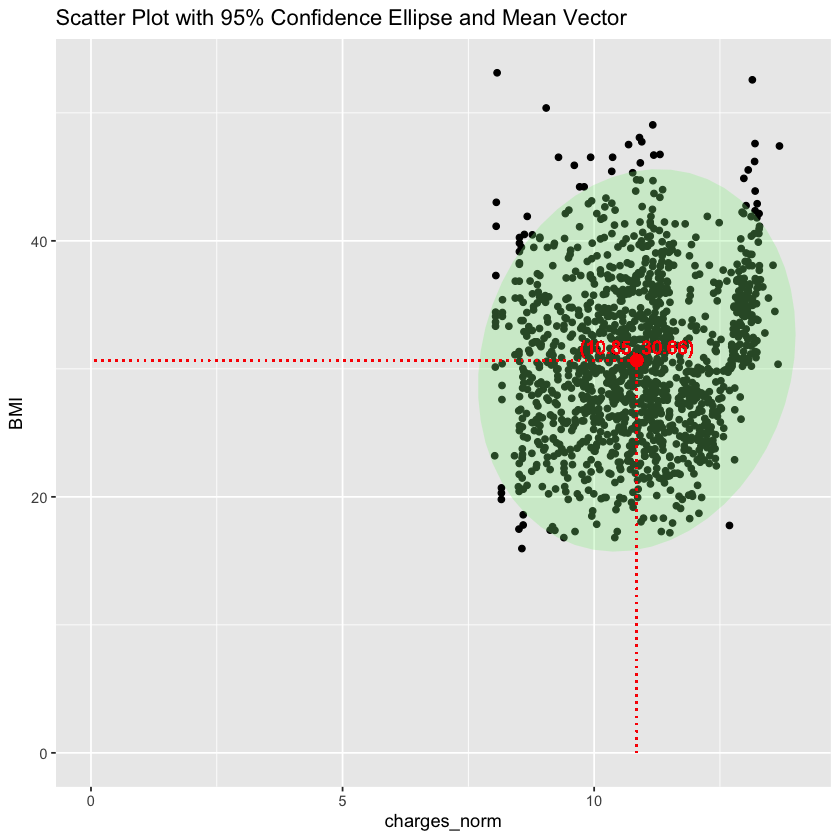

In [58]:
#plotting Ellipse with 95% confidence
# Install and load necessary libraries
install.packages("ggplot2")
install.packages("ellipse")
library(ggplot2)
library(ellipse)
# Your data
#mean vector
mean_vector = colMeans(dd)
#scatter plot with confidence ellipse
p = ggplot(dd, aes(x = charges_norm, y = V2)) +geom_point() +stat_ellipse(type = "norm", level = 0.95, geom = "polygon", fill = "lightgreen", alpha = 0.3) +
geom_point(aes(x = mean_vector[1], y = mean_vector[2]), color = "red", size = 3) +geom_text(aes(x = mean_vector[1], y = mean_vector[2], label = sprintf("(%0.2f, %0.2f)",
mean_vector[1], mean_vector[2])), vjust = -0.5, color = "red")+geom_segment(aes(x = mean_vector[1], y = mean_vector[2], xend = mean_vector[1], yend =0), linetype = "dotted", color = "red") +
geom_segment(aes(x = mean_vector[1], y = mean_vector[2], xend = 0, yend =
mean_vector[2]), linetype = "dotted", color = "red") +labs(title = "Scatter Plot with 95% Confidence Ellipse and Mean Vector",
x = "charges_norm",
y = "BMI")
print(p)